In [1]:
import pandas
pandas.set_option('display.max_columns', None)  # or 1000
pandas.set_option('display.max_rows', None)  # or 1000
pandas.set_option('display.max_colwidth', None)  # or 199
import pickle
import os

%reload_ext autoreload
%autoreload 2

from pyBenchmark import loadPickle, data_to_df, eliminate_blkSize_by_max, plot_data

In [7]:
# okay now load data
target = 'copy_noMalloc'
# data = loadPickle(filepath='benchdata/'+target+'.pickle')
data = loadPickle(filepath='../'+target+'.pickle')
print(data)
df = data_to_df({target: data})
# df.index.name = "Output"
# df.columns.name = "Bench params"
display(df)

{('realF', 32, 1, 32): {(4, 4, 4, 4): {'task': 'copy_noMalloc', 'mu': 999, 'isForward': 'true', 'T': 'realF', 'sizeof_T': 4, 'N': 32, 'numRHS': 1, 'grid': (4, 4, 4, 4), 'numSites': 256, 'blkSize': 32, 'time(us)': 57.161, 'srhs_bw(GBs)': 19.4908, 'mrhs_bw(GBs)': 19.4908, 'copy_bw(GBs)': 1.14652}, (4, 4, 8, 8): {'task': 'copy_noMalloc', 'mu': 999, 'isForward': 'true', 'T': 'realF', 'sizeof_T': 4, 'N': 32, 'numRHS': 1, 'grid': (4, 4, 8, 8), 'numSites': 1024, 'blkSize': 32, 'time(us)': 55.418, 'srhs_bw(GBs)': 80.4152, 'mrhs_bw(GBs)': 80.4152, 'copy_bw(GBs)': 4.7303}, (8, 8, 8, 8): {'task': 'copy_noMalloc', 'mu': 999, 'isForward': 'true', 'T': 'realF', 'sizeof_T': 4, 'N': 32, 'numRHS': 1, 'grid': (8, 8, 8, 8), 'numSites': 4096, 'blkSize': 32, 'time(us)': 571.974, 'srhs_bw(GBs)': 31.1654, 'mrhs_bw(GBs)': 31.1654, 'copy_bw(GBs)': 1.83326}, (16, 16, 16, 16): {'task': 'copy_noMalloc', 'mu': 999, 'isForward': 'true', 'T': 'realF', 'sizeof_T': 4, 'N': 32, 'numRHS': 1, 'grid': (16, 16, 16, 16), 'n

target        copy_noMalloc                                                  \
T                     realF                                                   
N                       32                                                    
numRHS                   1                                                    
blkSize                 32                                                    
grid           (4, 4, 4, 4)   (4, 4, 8, 8)   (8, 8, 8, 8)  (16, 16, 16, 16)   
result                                                                        
task          copy_noMalloc  copy_noMalloc  copy_noMalloc     copy_noMalloc   
mu                      999            999            999               999   
isForward              true           true           true              true   
T                     realF          realF          realF             realF   
sizeof_T                  4              4              4                 4   
N                        32             32             32                32   
numRHS                    1              1              1                 1   
grid           (4, 4, 4, 4)   (4, 4, 8, 8)   (8, 8, 8, 8)  (16, 16, 16, 16)   
numSites                256           1024           4096             65536   
blkSize                  32             32             32                32   
time(us)             57.161         55.418        571.974           2440.61   
srhs_bw(GBs)        19.4908        80.4152        31.1654           116.861   
mrhs_bw(GBs)        19.4908        80.4152        31.1654           116.861   
copy_bw(GBs)        1.14652         4.7303        1.83326            6.8742   

target                                                                       \
T                                                                             
N                                                                             
numRHS                                                                        
blkSize                 64                                                    
grid           (4, 4, 4, 4)   (4, 4, 8, 8)   (8, 8, 8, 8)  (16, 16, 16, 16)   
result                                                                        
task          copy_noMalloc  copy_noMalloc  copy_noMalloc     copy_noMalloc   
mu                      999            999            999               999   
isForward              true           true           true              true   
T                     realF          realF          realF             realF   
sizeof_T                  4              4              4                 4   
N                        32             32             32                32   
numRHS                    1              1              1                 1   
grid           (4, 4, 4, 4)   (4, 4, 8, 8)   (8, 8, 8, 8)  (16, 16, 16, 16)   
numSites                256           1024           4096             65536   
blkSize                  64             64             64                64   
time(us)             42.462         46.156        468.447            2463.1   
srhs_bw(GBs)        26.2379        96.5519         38.053           115.794   
mrhs_bw(GBs)        26.2379        96.5519         38.053           115.794   
copy_bw(GBs)         1.5434        5.67952        2.23841           6.81141   

target                                                                       \
T                                                                             
N                                                                             
numRHS                                                                        
blkSize                 128                                                   
grid           (4, 4, 4, 4)   (4, 4, 8, 8)   (8, 8, 8, 8)  (16, 16, 16, 16)   
result                                                                        
task          copy_noMalloc  copy_noMalloc  copy_noMalloc     copy_noMalloc   
mu                      999            999      

<AxesSubplot: xlabel='T'>

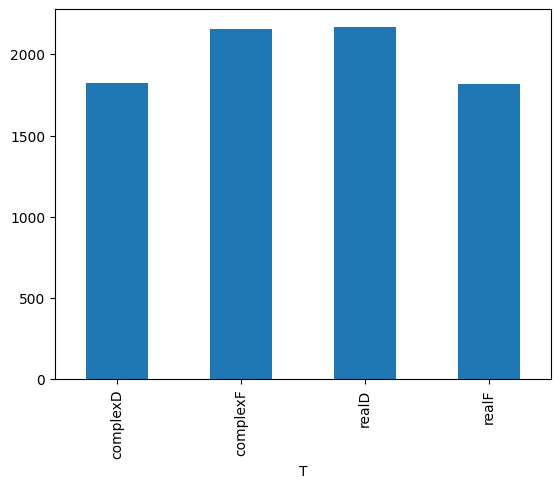

In [5]:
# use .loc to access the desired value of axis 0 e.g. srhs_bw or mrhs_bw
# use .xs function to access data by level name (very nice :) )
srhs_series = df.loc['srhs_bw(GBs)', ].xs('mrhs_lanes', level='target').xs('(16, 16, 16, 16)', level='grid').xs(64, level='N').xs(60, level='numRHS')

dataset = eliminate_blkSize_by_max(srhs_series)
dataset.plot(kind='bar')

In [43]:
selectors = {'grid': '(8, 8, 8, 8)', 'T': 'realF', 'target': 'stencil_blas', 'numRHS': 60}
plot_data(df=df, ax=None, xlabel='N', valuelabel='srhs_bw(GBs)', selectors=selectors)

TypeError: plot_data() got an unexpected keyword argument 'xlabel'